File loaded successfully.


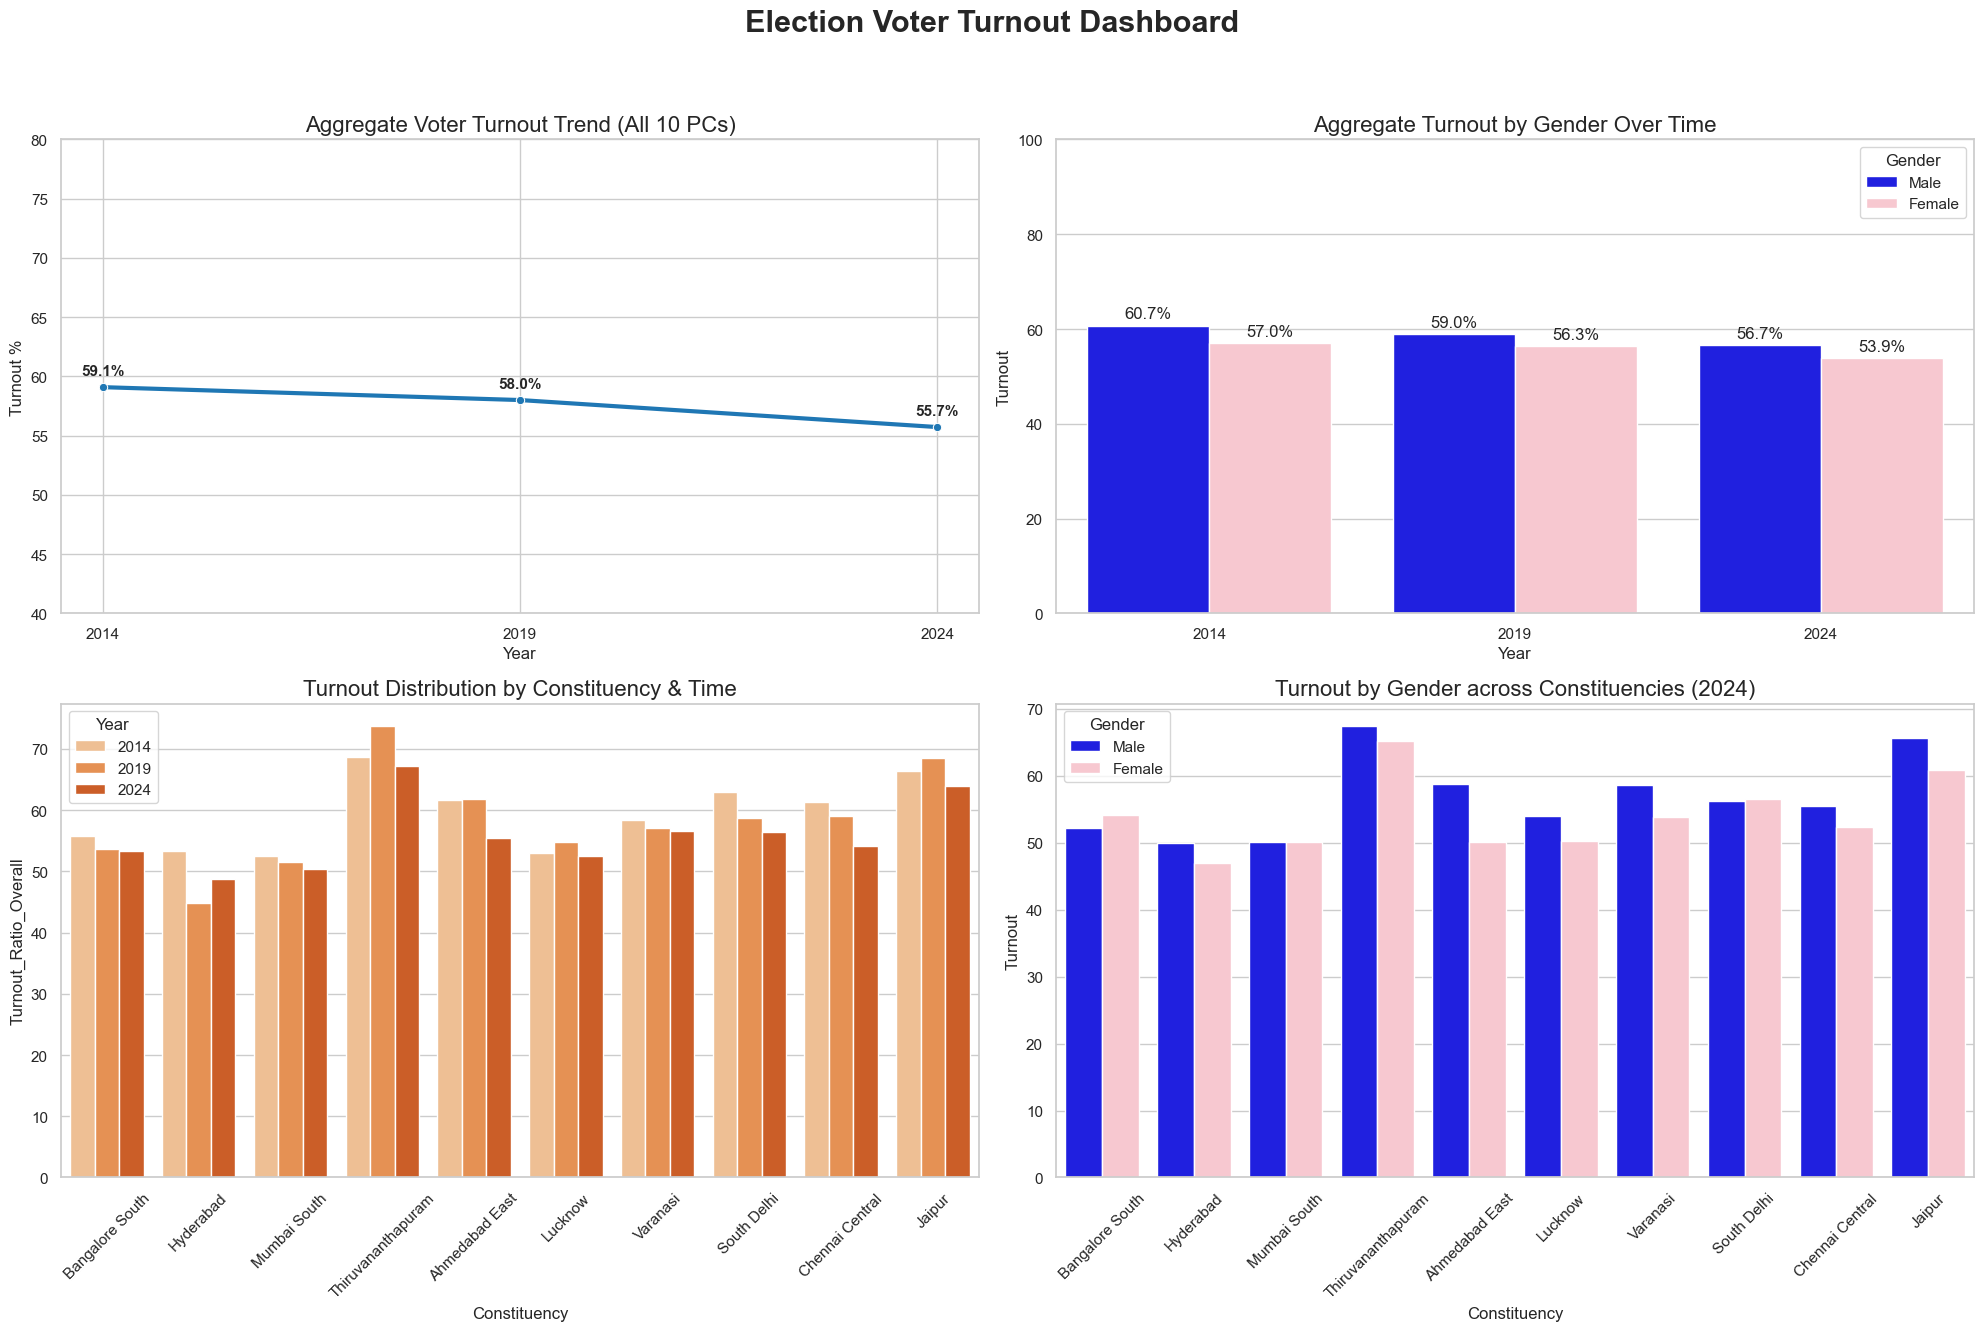

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Load your dataset
filename = '1100378_Final_Election_data.csv'

# Check if file exists before trying to read it
if os.path.exists(filename):
    df = pd.read_csv(filename)
    print("File loaded successfully.")
else:
    print(f"ERROR: The file '{filename}' was not found.")
    print("Please ensure the CSV file is in the same folder as this notebook.")

# --- Data Preparation for Aggregates ---
# 1. Aggregate Overall Turnout
agg_df = df.groupby('Year')[['Votes_Polled_Total', 'Electors_Total']].sum().reset_index()
agg_df['Agg_Turnout_Overall'] = (agg_df['Votes_Polled_Total'] / agg_df['Electors_Total']) * 100

# 2. Aggregate Gender Turnout
agg_gender_df = df.groupby('Year')[['Votes_Polled_Male', 'Electors_Male', 'Votes_Polled_Female', 'Electors_Female']].sum().reset_index()
agg_gender_df['Male'] = (agg_gender_df['Votes_Polled_Male'] / agg_gender_df['Electors_Male']) * 100
agg_gender_df['Female'] = (agg_gender_df['Votes_Polled_Female'] / agg_gender_df['Electors_Female']) * 100
agg_gender_melted = agg_gender_df.melt(id_vars='Year', value_vars=['Male', 'Female'], var_name='Gender', value_name='Turnout')

# --- Plotting the Dashboard ---
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Election Voter Turnout Dashboard', fontsize=22, weight='bold', y=0.98)

# Define Custom Palette for Genders
gender_palette = {'Male': 'blue', 'Female': 'pink'}

# Chart 1: Aggregate Turnout Over Time
sns.lineplot(ax=axes[0, 0], data=agg_df, x='Year', y='Agg_Turnout_Overall', marker='o', linewidth=3, color='#1f77b4')
axes[0, 0].set_title('Aggregate Voter Turnout Trend (All 10 PCs)', fontsize=16)
axes[0, 0].set_ylabel('Turnout %')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_xticks([2014, 2019, 2024])
axes[0, 0].set_ylim(40, 80)
# Add labels
for x, y in zip(agg_df['Year'], agg_df['Agg_Turnout_Overall']):
    axes[0, 0].text(x, y+1, f'{y:.1f}%', ha='center', fontsize=11, fontweight='bold')

# Chart 2: Aggregate Turnout Across Genders
sns.barplot(ax=axes[0, 1], data=agg_gender_melted, x='Year', y='Turnout', hue='Gender', palette=gender_palette)
axes[0, 1].set_title('Aggregate Turnout by Gender Over Time', fontsize=16)
axes[0, 1].set_ylim(0, 100)
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%.1f%%', padding=3)

# Chart 3: Distribution Across Constituencies and Time
# Custom orange palette for years
year_orange_palette = ['#FDBE85', '#FD8D3C', '#E6550D'] # Lighter to darker orange
sns.barplot(ax=axes[1, 0], data=df, x='Constituency', y='Turnout_Ratio_Overall', hue='Year', palette=year_orange_palette)
axes[1, 0].set_title('Turnout Distribution by Constituency & Time', fontsize=16)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(loc='upper left', title='Year')

# Chart 4: Turnout Across Constituencies and Genders (2024 Snapshot)
df_2024 = df[df['Year'] == 2024].copy()
df_2024_melted = df_2024.melt(id_vars='Constituency', value_vars=['Turnout_Ratio_Male', 'Turnout_Ratio_Female'],
                              var_name='Gender_Col', value_name='Turnout')
df_2024_melted['Gender'] = df_2024_melted['Gender_Col'].apply(lambda x: 'Male' if 'Male' in x else 'Female')
sns.barplot(ax=axes[1, 1], data=df_2024_melted, x='Constituency', y='Turnout', hue='Gender', palette=gender_palette)
axes[1, 1].set_title('Turnout by Gender across Constituencies (2024)', fontsize=16)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(loc='upper left', title='Gender')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('final_assignment_dashboard.png')
plt.show()